# Import necessary python modules

In [1]:
!pip install transformers gradio scipy ftfy "ipywidgets>=7,<8" datasets diffusers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 11.6 MB 65.7 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 451 kB 59.6 MB/s 
     |████████████████████████████████| 304 kB 60.0 MB/s 
     |████████████████████████████████| 175 kB 72.2 MB/s 
     |████████████████████████████████| 1.6 MB 43.9 MB/s 
     |████████████████████████████████| 7.6 MB 47.2 MB/s 
     |████████████████████████████████| 182 kB 57.5 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 56 kB 3.2 MB/s 
     |████████████████████████████████| 272 kB 57.0 MB/s 
     |████████████████████████████████| 2.3 MB 30.7 MB/s 
     |████████████████████████████████| 106 kB 47.4 MB/s 
     |████████████████████████████████|

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import the pretrained diffusion model

In [3]:
#!pip install diffusers==0.3.0
from diffusers import StableDiffusionImg2ImgPipeline
import requests
from PIL import Image
from io import BytesIO

# using the 115,000 steps checkpoint
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("naclbit/trinart_stable_diffusion_v2", revision="diffusers-115k")
pipe.to("cuda")

Downloading:   0%|          | 0.00/555 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/220 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/617 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/552 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.7.2",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "LMSDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

# Generate an image with a prompt and an initial image

Here, you can generate an image starting either from a given initial image or from a randomly sampled image (uniform sampling).

There are two important parameters : 'strength' determines how much computation is done from the initial image to obtain the final result  while 'guidance_scale' determines how much the text prompt should influence the final result.

  0%|          | 0/37 [00:00<?, ?it/s]

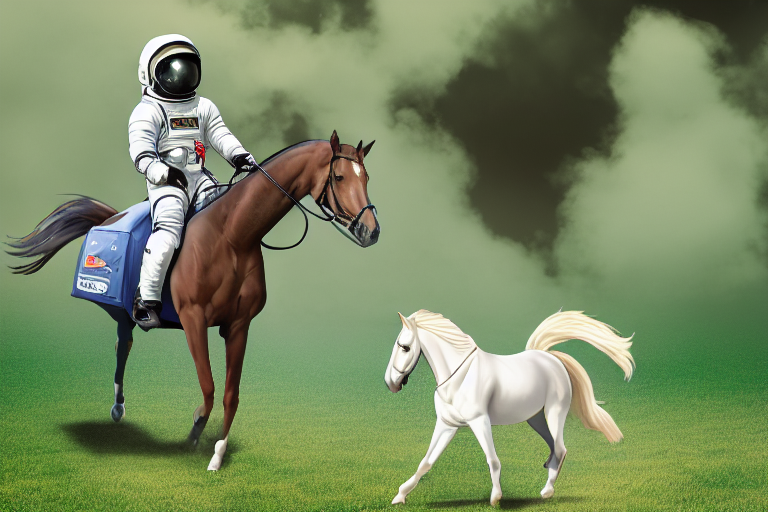

In [4]:
# Initial image loaded from a URL
url = "https://scitechdaily.com/images/Dog-Park.jpg"
#url = "https://us.v-cdn.net/5021068/uploads/editor/0s/yzsojy1weqa9.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

# Random initial image
#init_array = np.random.randint(0, 255, (512, 768, 3), dtype=np.uint8)
#init_image = Image.fromarray(init_array)

text_prompt = "An astronaut riding a horse"

images = pipe(prompt=text_prompt, init_image=init_image, strength=.75, guidance_scale=10).images
images[0]

## Series of prompts

Successive diffusion steps with different prompts. It is unlikely to give a good result in one try, yet it gives an example of how a generated result can be used as the input of a following generation step.

In [5]:
# Initial image loaded from a URL
url = "https://scitechdaily.com/images/Dog-Park.jpg"
#url = "https://us.v-cdn.net/5021068/uploads/editor/0s/yzsojy1weqa9.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

# Random initial image
#init_array = np.random.randint(0, 255, (512, 768, 3), dtype=np.uint8)
#init_image = Image.fromarray(init_array)

images = [init_image]

text_prompts = ["An astronaut riding a horse",
                "An astronaut riding a horse on the moon",
                "An astronaut riding a horse on the moon, with a spaceship in the background"]



for prompt in text_prompts :

  image = pipe(prompt=prompt, init_image=images[-1], strength=.75, guidance_scale=7.5).images
  images.append(image[0])

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

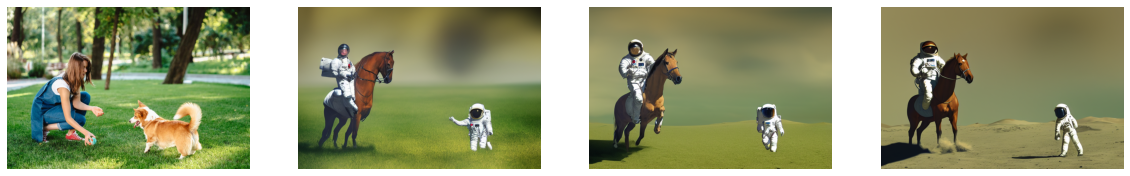

In [6]:
plt.figure(figsize=(20,8))
for i in range(len(images)) :
  plt.subplot(1,len(images), i+1)
  plt.axis('off')
  plt.imshow(np.array(images[i]))